In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


In [2]:
def train_regression(X,Y):
    
    from sklearn.cross_decomposition import PLSRegression
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import scale
    
    X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=0) 

    pls = PLSRegression(n_components=216)
    pls.fit(scale(X_train), y_train)
    s = pls.score(scale(X_test),y_test)
    print("%f \n"%(s))
    ypred = pls.predict(scale(X))
    return ypred

In [3]:
def r2score(y,ypred):
    ymean = np.mean(y)
    num = np.sum((y - ypred.reshape(-1))**2)
    den = np.sum((y - ymean)**2)
    output = 1-num/den
    return output


In [4]:
def final_prediction(y_predict,d,i):
    
    #randomization for prediction
    index = np.random.choice(d.shape[0],d.shape[0] , replace = False )
    d = d[index,:]
    y_prediction = y_predict[index,:]
    data_X = d[:,0:216]
    data_Y = d[:,216:432]
    data_C = d[:,432]
    
    #prediction
    pred = model.predict(data_X[i].reshape(1,-1))
        
    accuracy = r2score(data_Y[i],y_prediction[i])
        
    print('predicted class of given sample is:',int(pred))
    print('Actual class of given sample is:',int(data_C[i]))
    print('R2 SCORE for regression:',accuracy)
        
    plt.figure(figsize = ((10,6)))
    plt.plot(y_prediction[i], 'g--',label = 'predicted',lw = 3)
    plt.plot(data_Y[i], color = 'red', label = 'actual')
    plt.legend()
    plt.show()
        
    return pred, accuracy, y_prediction[i]

In [5]:
def classification_data(data1,data3):
    #for classification 
    data13 = np.append(data1,data3,axis=1)
    index1 = np.random.choice(data13.shape[0],data13.shape[0] , replace = False )
    data13 = data13[index1,:]
    X = data13[:,0:216]
    y1 = data13[:,216]
    return X,y1

In [6]:
def regression_data(data1,data2,data3):
    #for regression
    d = np.append(data1,data2, axis=1)
    d = np.append(d,data3, axis=1)
    
    data = pd.DataFrame(d)
    data01 = data[data[432] == -1]
    data02 = data[data[432] == 1]
    #minus1 class
    X1 = data01.iloc[:,0:216]
    Y1 = data01.iloc[:,216:432]
    C1 = data01.iloc[:,432]
    #plus1 class
    X2 = data02.iloc[:,0:216]
    Y2 = data02.iloc[:,216:432]
    C2 = data02.iloc[:,432]
    
    return X1,Y1,C1,X2,Y2,C2,d



In [7]:
#--------------------------implementation--------------------------

#----------first -- TRAINING -----------------------------
        
#randomization of data
data1 = pd.read_csv('input.csv',header = None)
data2 = pd.read_csv('output.csv', header = None)
data3 = pd.read_csv('output_label.csv',header = None, names = ['label'])
X,y1 = classification_data(data1,data3)
X1,Y1,C1,X2,Y2,C2,d = regression_data(data1,data2,data3)

In [8]:
#classification
#extratreeclassification model
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

x_train,x_test,y_train,y_test = train_test_split(X,y1,test_size = 0.25, random_state = 42)
model = ExtraTreesClassifier(n_estimators = 100)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(cross_val_score(model,x_train,y_train,cv=5).mean())
print(classification_report(y_test,predictions))


0.9808094730637562
              precision    recall  f1-score   support

        -1.0       0.98      0.99      0.99      6327
         1.0       0.98      0.97      0.97      2914

    accuracy                           0.98      9241
   macro avg       0.98      0.98      0.98      9241
weighted avg       0.98      0.98      0.98      9241



In [9]:
#PLS regression model

#train_minus1_class
print("\nscore after training minus1 class")
y_pred_minus1 =  train_regression(X1,Y1)
#train_plus1_class
print("\nscore after training plus1 class")
y_pred_plus1 = train_regression(X2,Y2)

y_predict = np.append(y_pred_minus1,y_pred_plus1,axis=0)



score after training minus1 class
0.998265 


score after training plus1 class
0.999044 





------Some test cases for evaluation and visualization-------


predicted class of given sample is: -1
Actual class of given sample is: -1
R2 SCORE for regression: 0.9999999611192175


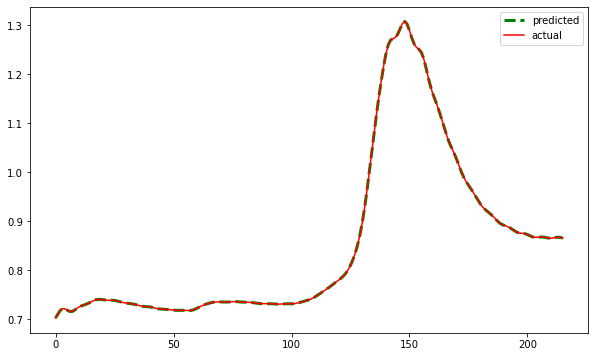

predicted class of given sample is: 1
Actual class of given sample is: 1
R2 SCORE for regression: 0.9988375598469303


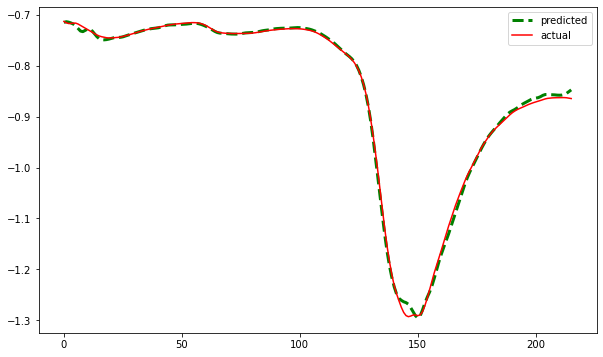

predicted class of given sample is: 1
Actual class of given sample is: 1
R2 SCORE for regression: 0.9975482742806914


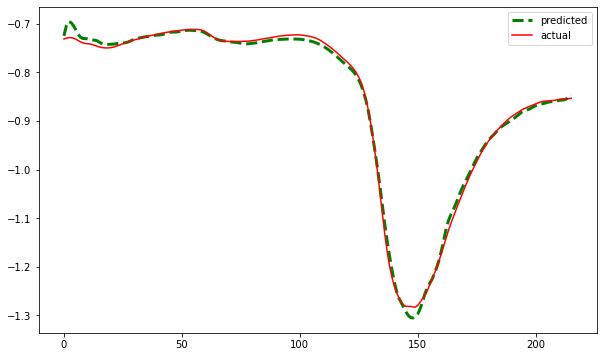

predicted class of given sample is: -1
Actual class of given sample is: -1
R2 SCORE for regression: 0.9999999404051589


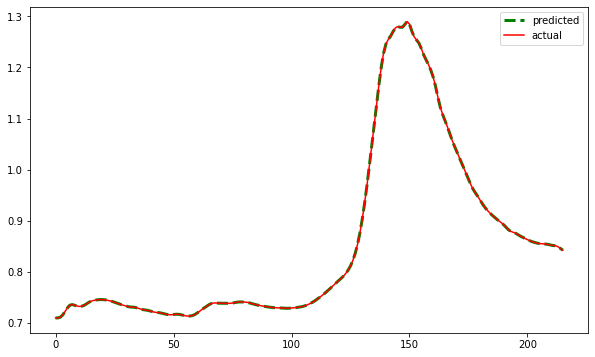

predicted class of given sample is: -1
Actual class of given sample is: -1
R2 SCORE for regression: 0.9999999530096093


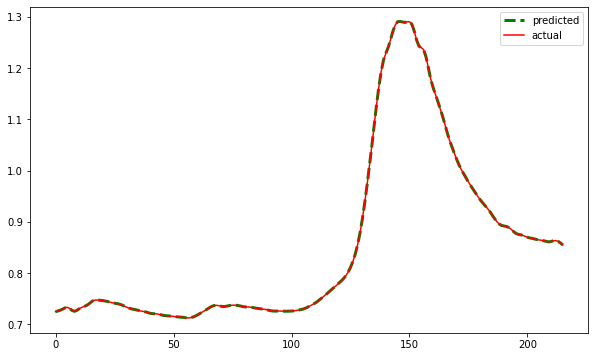

predicted class of given sample is: 1
Actual class of given sample is: 1
R2 SCORE for regression: 0.9982323415216184


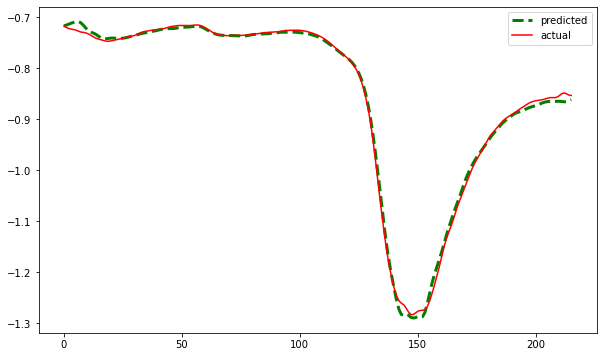

predicted class of given sample is: 1
Actual class of given sample is: 1
R2 SCORE for regression: 0.9991387737200129


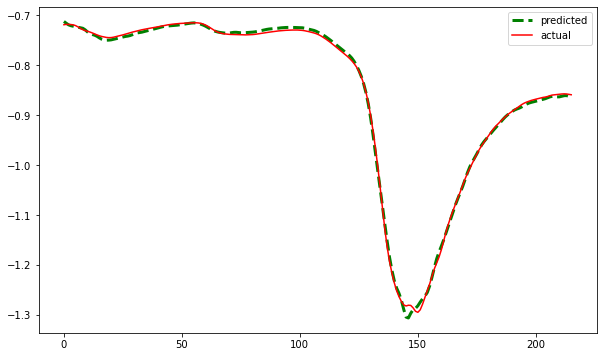

predicted class of given sample is: -1
Actual class of given sample is: -1
R2 SCORE for regression: 0.999999952823542


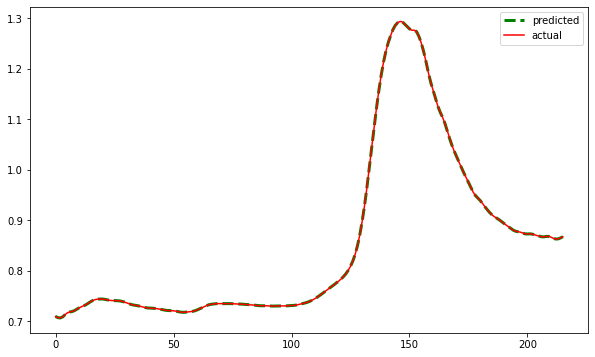

predicted class of given sample is: -1
Actual class of given sample is: -1
R2 SCORE for regression: 0.999999956174114


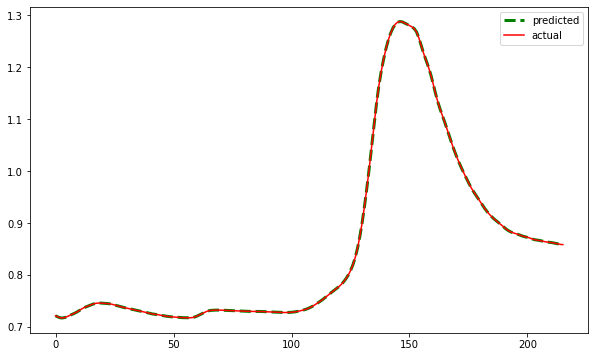

predicted class of given sample is: 1
Actual class of given sample is: 1
R2 SCORE for regression: 0.9989606156078326


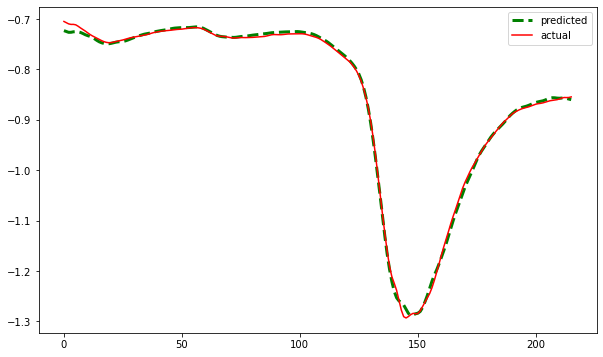



---------------ypred overall visualization----------------




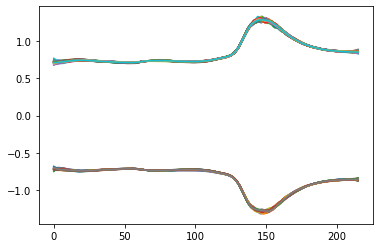

In [10]:
#---------------second -- output visualization  ---------------
print('\n\n------Some test cases for evaluation and visualization-------\n\n')
nums = np.random.choice(data1.shape[0],10, replace = False) 
for i in nums:
    final_prediction(y_predict,d,i)
    
print("\n\n---------------ypred overall visualization----------------\n\n")
r = np.random.choice(data1.shape[0],300, replace = False)
for j in r:
    index = np.random.choice(d.shape[0],d.shape[0] , replace = False )
    y_prediction = y_predict[index,:]
    plt.plot(y_prediction[i])

#for checking any specific case
#final_prediction(data_X,data_Y,data_C, 0)